# Background Segmentation

In [1]:
import torch
from utils import setup_data_loaders, train_model
from models.models import get_model

c:\Users\Aaron\Documents\github\background-segmentation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
HEIGHT = 512
WIDTH = 384
NUM_WORKERS = 3
PIN_MEMORY = True
TRAIN_ONE_BATCH = False

In [3]:
train_loader, val_loader = setup_data_loaders(BATCH_SIZE, NUM_WORKERS, PIN_MEMORY, image_height=HEIGHT, image_width=WIDTH)

### UNet

In [4]:
n_epochs = 100
weight_decay = 0.05
lr = 1e-3

wandb: Currently logged in as: aaronespasa (uc3m-ml). Use `wandb login --relogin` to force relogin


c:\Users\Aaron\Documents\github\background-segmentation\venv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Validation (epoch 1):   0%|          | 0/47 [00:00<?, ?it/s]c:\Users\Aaron\Documents\github\background-segmentation\venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Validation (epoch 1): 100%|██████████| 47/47 [00:10<00:00,  4.58it/s]



Epoch: 1/100
	➡️ Loss --> Training: 0.1140 | Validation: 0.1027
	➡️ IoU --> Training: 93.40% | Validation: 95.09%



Validation (epoch 2): 100%|██████████| 47/47 [00:10<00:00,  4.50it/s]



Epoch: 2/100
	➡️ Loss --> Training (📉): 0.0599 | Validation (📉): 0.0903
	➡️ IoU --> Training (📈): 96.29% | Validation (📈): 95.49%



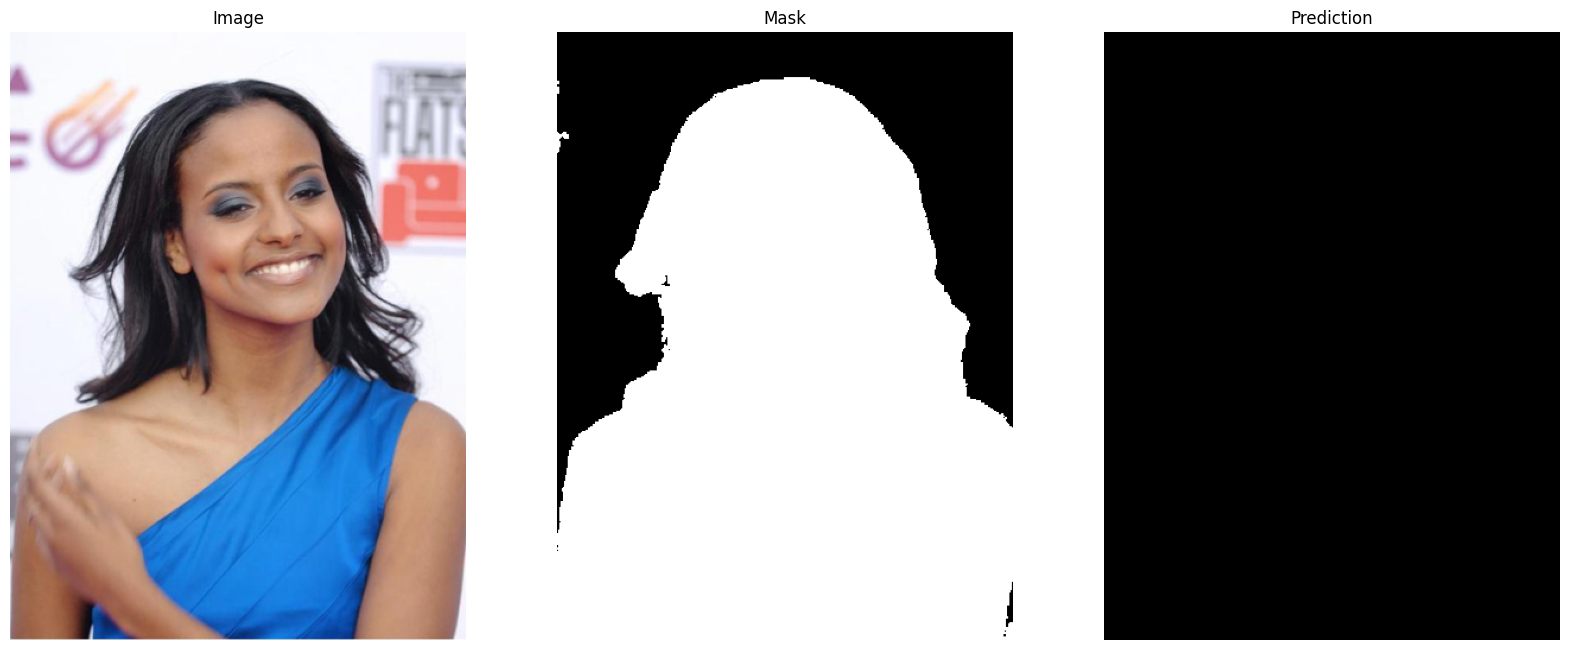

Validation (epoch 3): 100%|██████████| 47/47 [00:10<00:00,  4.58it/s]



Epoch: 3/100
	➡️ Loss --> Training (📉): 0.0528 | Validation (📈): 0.1245
	➡️ IoU --> Training (📈): 96.69% | Validation (📉): 94.67%



Validation (epoch 4): 100%|██████████| 47/47 [00:10<00:00,  4.54it/s]



Epoch: 4/100
	➡️ Loss --> Training (📉): 0.0461 | Validation (📉): 0.0766
	➡️ IoU --> Training (📈): 97.10% | Validation (📈): 96.34%



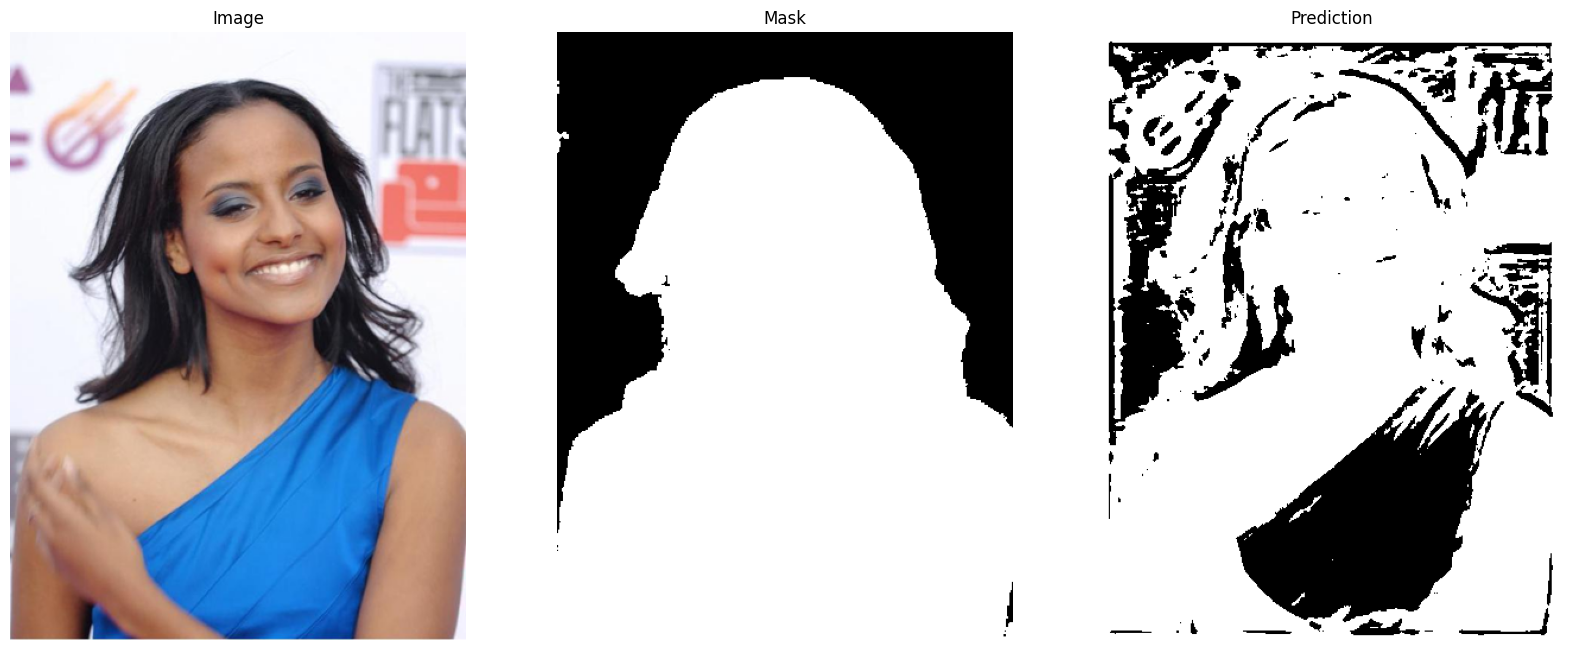

Validation (epoch 5): 100%|██████████| 47/47 [00:10<00:00,  4.49it/s]



Epoch: 5/100
	➡️ Loss --> Training (📉): 0.0375 | Validation (📈): 0.0808
	➡️ IoU --> Training (📈): 97.64% | Validation (📈): 96.41%



Validation (epoch 6): 100%|██████████| 47/47 [00:10<00:00,  4.60it/s]



Epoch: 6/100
	➡️ Loss --> Training (📈): 0.0438 | Validation (📈): 0.0845
	➡️ IoU --> Training (📉): 97.24% | Validation (📉): 96.13%



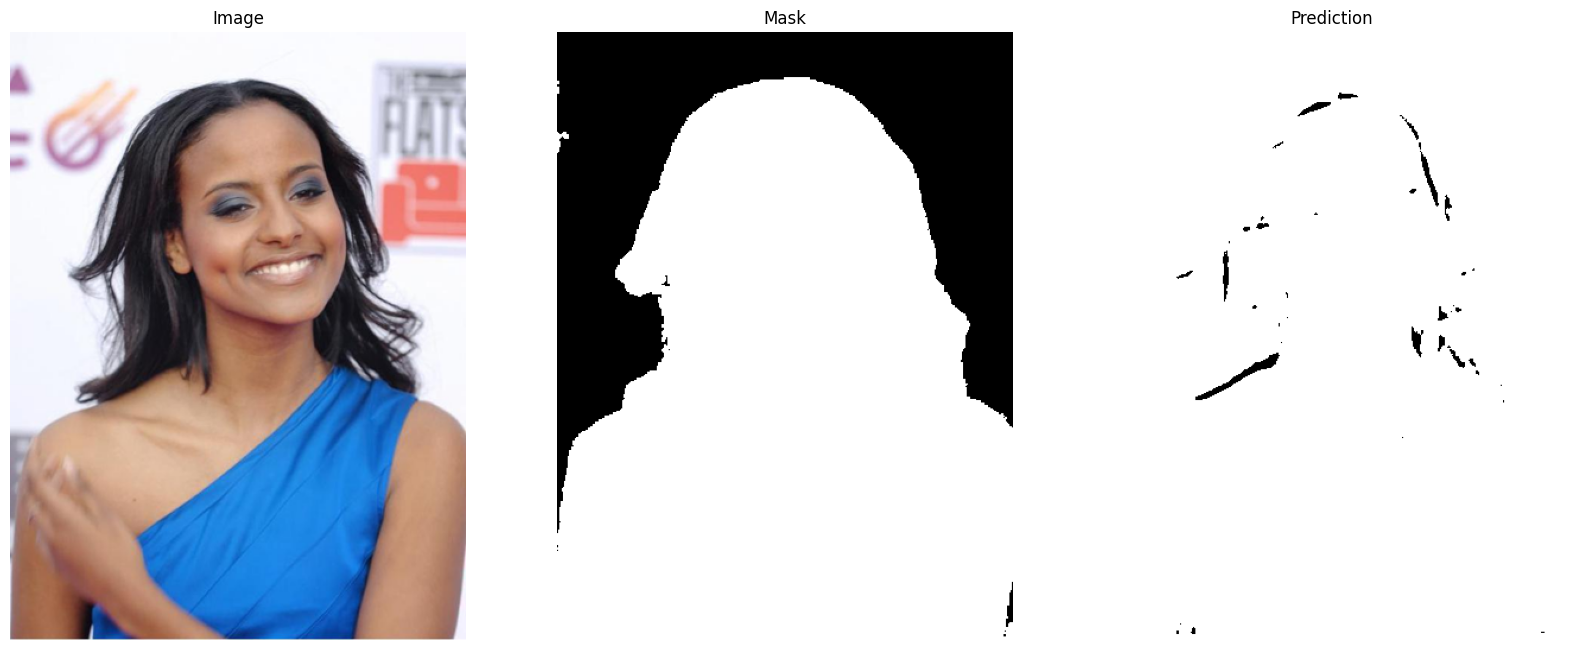

Validation (epoch 7): 100%|██████████| 47/47 [00:10<00:00,  4.59it/s]



Epoch: 7/100
	➡️ Loss --> Training (📉): 0.0364 | Validation (📉): 0.0797
	➡️ IoU --> Training (📈): 97.65% | Validation (📈): 96.31%



Validation (epoch 8): 100%|██████████| 47/47 [00:10<00:00,  4.54it/s]



Epoch: 8/100
	➡️ Loss --> Training (📉): 0.0346 | Validation (📈): 0.0809
	➡️ IoU --> Training (📈): 97.80% | Validation (📈): 96.36%



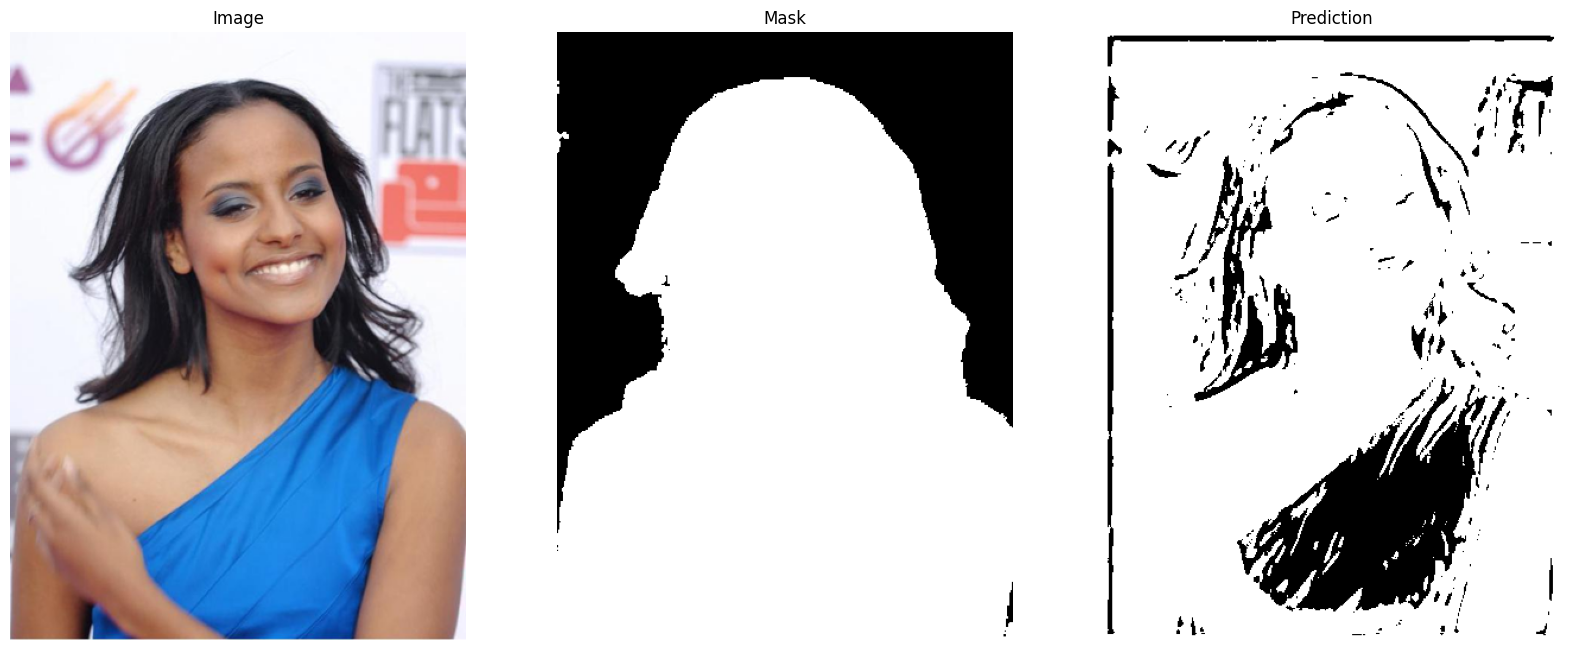

Validation (epoch 9): 100%|██████████| 47/47 [00:10<00:00,  4.51it/s]



Epoch: 9/100
	➡️ Loss --> Training (📈): 0.0372 | Validation (📈): 0.0909
	➡️ IoU --> Training (📉): 97.59% | Validation (📉): 95.72%



Validation (epoch 10): 100%|██████████| 47/47 [00:10<00:00,  4.48it/s]



Epoch: 10/100
	➡️ Loss --> Training (📈): 0.0410 | Validation (📉): 0.0893
	➡️ IoU --> Training (📉): 97.32% | Validation (📈): 96.09%



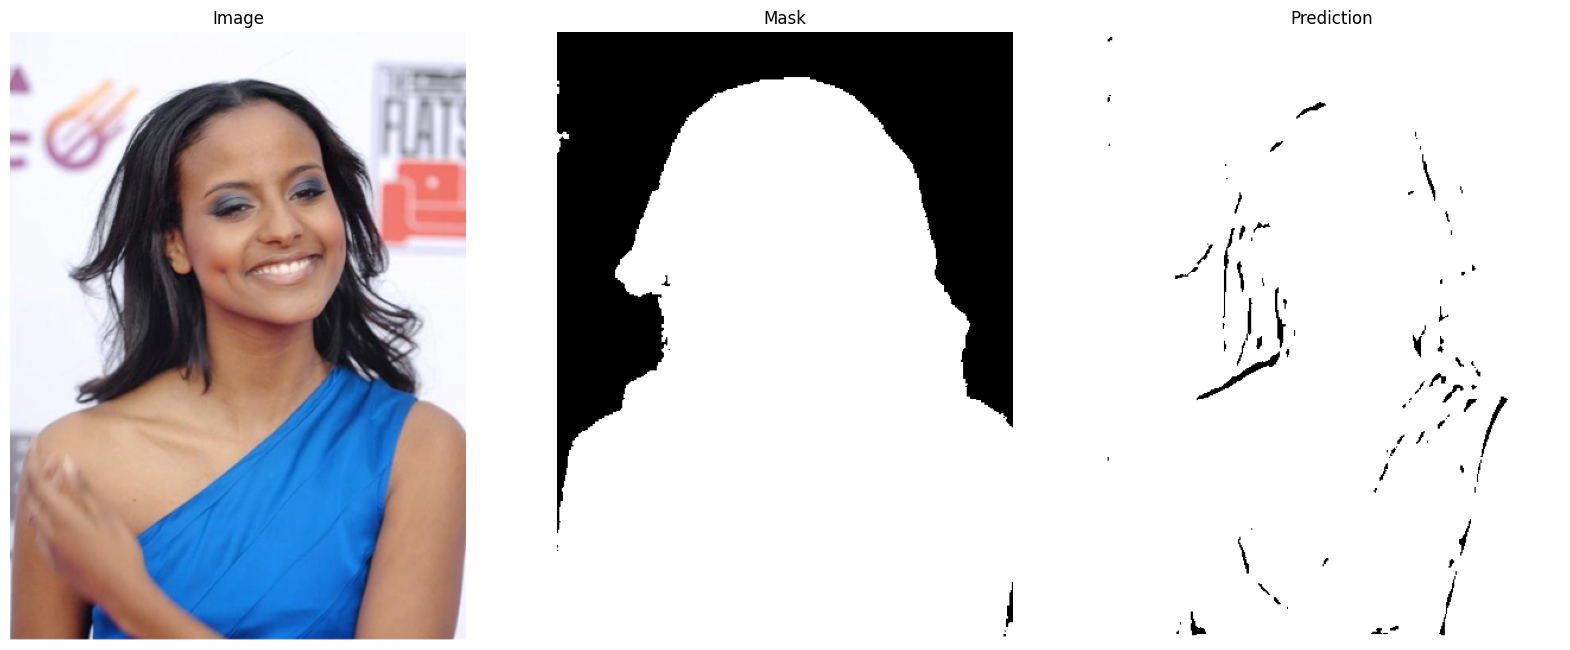

Validation (epoch 11): 100%|██████████| 47/47 [00:10<00:00,  4.55it/s]



Epoch: 11/100
	➡️ Loss --> Training (📉): 0.0345 | Validation (📉): 0.0817
	➡️ IoU --> Training (📈): 97.72% | Validation (📈): 96.09%



Validation (epoch 12): 100%|██████████| 47/47 [00:10<00:00,  4.49it/s]



Epoch: 12/100
	➡️ Loss --> Training (📉): 0.0291 | Validation (📉): 0.0743
	➡️ IoU --> Training (📈): 98.04% | Validation (📈): 96.80%



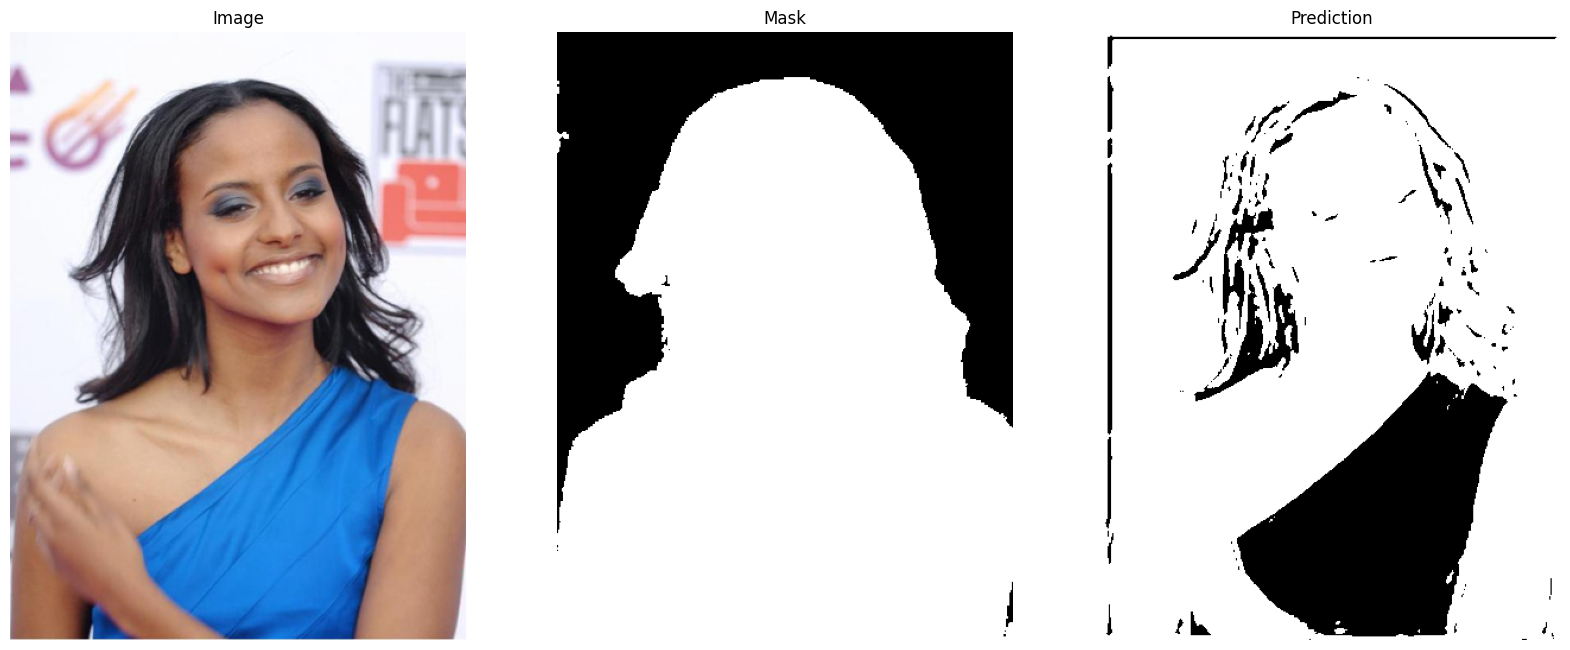

Validation (epoch 13): 100%|██████████| 47/47 [00:10<00:00,  4.59it/s]



Epoch: 13/100
	➡️ Loss --> Training (📉): 0.0279 | Validation (📈): 0.0769
	➡️ IoU --> Training (📈): 98.09% | Validation (📉): 96.68%



Validation (epoch 14): 100%|██████████| 47/47 [00:10<00:00,  4.57it/s]



Epoch: 14/100
	➡️ Loss --> Training (📉): 0.0276 | Validation (📈): 0.0909
	➡️ IoU --> Training (📉): 98.04% | Validation (📉): 95.89%



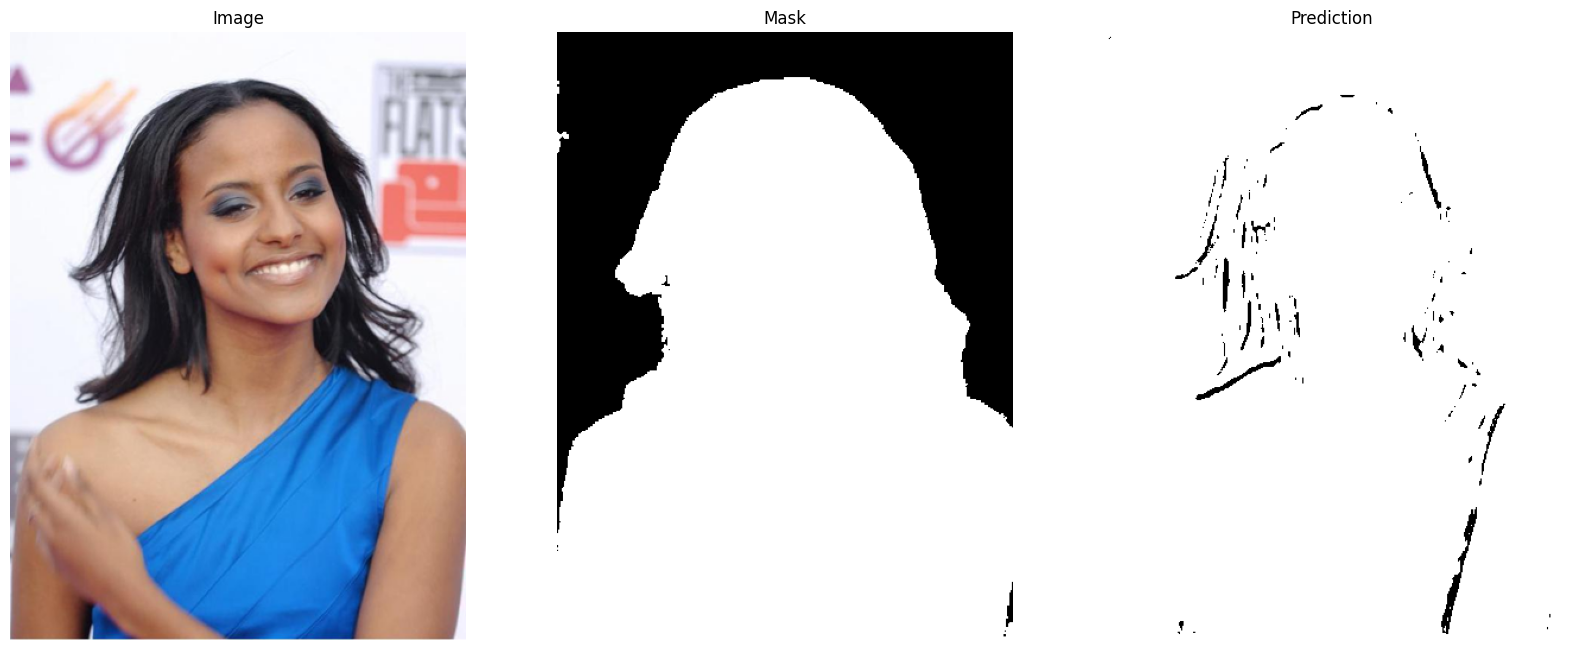

Training (epoch 15):   6%|▋         | 10/158 [00:06<01:30,  1.64it/s]


TypeError: finish_training() takes 2 positional arguments but 3 were given

In [5]:
model = get_model(encoder="resnet34", decoder="unet")

train_model(model, lr, n_epochs, train_loader, val_loader, BATCH_SIZE, DEVICE, weight_decay, img_h=HEIGHT, img_w=WIDTH, model_name=f"unet_resnet34_{lr}", run_name="UNet - ResNet34")